Import tensorflow prebuilt dataset Fashion_MNIST

In [1]:
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.layers import Dense, Activation,Input
from tensorflow.keras.models import Sequential
import numpy as np
train,test = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


We will use Fashion Mnist dataset.
contains 10 classes of fashion images.
grayscale.
use of keras.utils.to_categorical

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

In [2]:
train_x = train[0]
train_y = train[1]
test_x = test[0]
test_y = test[1]



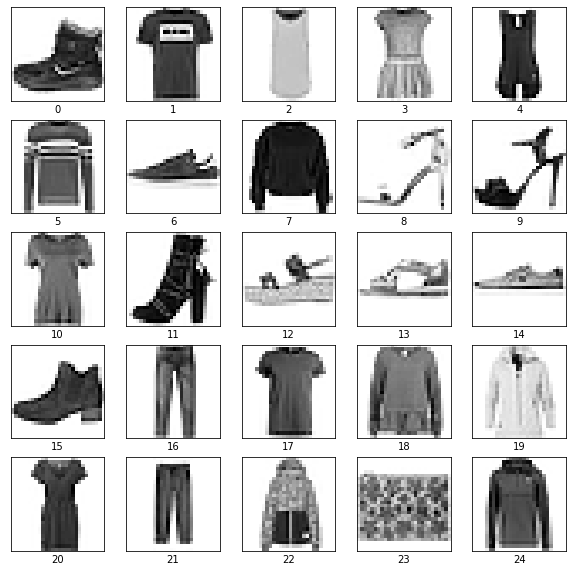

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_x[i],cmap='Greys')
  plt.xlabel(i)
plt.show()

In [4]:
train_x = np.reshape(train_x,[-1,784])
test_x = np.reshape(test_x,[-1,784])

train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)
print(test_y.shape)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
train_x =train_x/ 255.
test_x = test_x/255.

(10000, 10)
(60000, 784)
(60000, 10)
(10000, 784)


3 ways to create keras models n tensorflow 2.x


*   Sequential
*   Functional API
*   Model subclassing

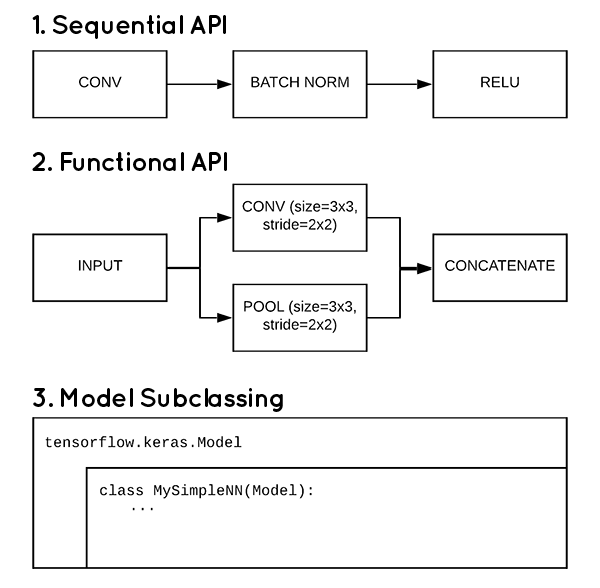







Sequential API

Keras Sequential API is by far the easiest way to get up and running with Keras, but it’s also the most limited — you cannot create models that:

*   Share layers
*   Have branches (at least not easily)
*   Have multiple inputs
*   Have multiple outputs







Now we will build tensorflow model with Object oriented approach and overriding Model API

In [5]:
def my_sequential_model(inp_dim, noc = 10):
  model = Sequential()
  model.add(Dense(input_dim = inp_dim, units= 50, name='dense-1', activation='relu'))
  model.add(Dense(units=50, activation='relu'))
  model.add(Dense(units=noc, activation='softmax'))
  return model

In [6]:
my_model = my_sequential_model(len(train_x[0]))
base_learning_rate = 0.0001
my_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                      loss=tf.keras.losses.categorical_crossentropy,
                      metrics=['accuracy'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense-1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense (Dense)                (None, 50)                2550      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


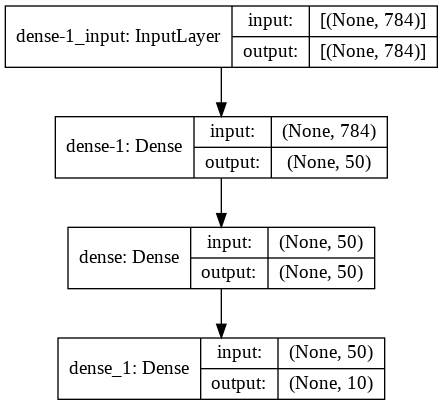

In [8]:
tf.keras.utils.plot_model(my_model,'my_model.png',show_shapes=True)

In [11]:
best_acc = 0
for e in range(20):
  history = my_model.fit(train_x, train_y, batch_size = 32, validation_data=(test_x,test_y), verbose=True, epochs=1)
  val_acc = history.history['val_accuracy'][0]
  if val_acc > best_acc:
    my_model.save('model_weights'+str(e)+'.h5')
    best_acc = val_acc

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2631 - accuracy: 0.9043 - val_loss: 0.3458 - val_accuracy: 0.8783


In [14]:
my_model.load_weights('model_weights24.h5')
predictions = my_model.predict(test_x[0:10])
for sample in predictions:
  print(np.argmax(sample))

9
2
1
1
6
1
4
6
5
7


Tensorflow-Keras Functional API

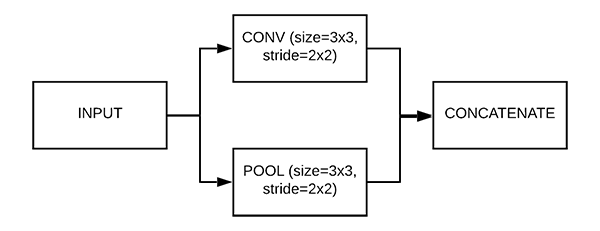

Using the Functional API you can:

1. Create more complex models.
2. Have multiple inputs and multiple outputs.
3. Easily define branches in your architectures (ex., an Inception block, ResNet block, etc.).
4. Design directed acyclic graphs (DAGs).
5. Easily share layers inside the architecture.


In [15]:
def my_functional_model(inp_shape, noc=10):
  inputs = Input(shape=inp_shape)
  layer1 = Dense(units=50)(inputs)
  act1= Activation('relu')(layer1)
  layer2 = Dense(units=50)(act1)
  act2 = Activation('relu')(layer2)
  out_layer= Dense(noc, activation='softmax')(act2)
  model = Model(inputs=inputs, outputs=out_layer)
  return model


In [16]:
print(train_x[0].shape)
my_model= my_functional_model(train_x[0].shape)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
l= tf.keras.losses.categorical_crossentropy
my_model.compile(optimizer=opt, loss=l, metrics=['accuracy'])
my_model.summary()

(784,)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
__________________________________________________

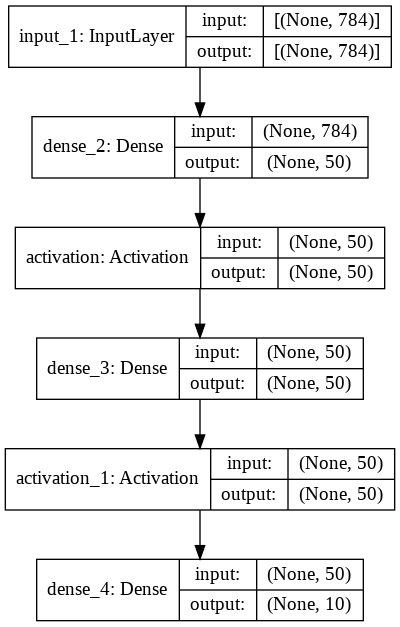

In [17]:
tf.keras.utils.plot_model(my_model,'my_model.png',show_shapes=True)

In [ ]:
history = my_model.fit(train_x, train_y, batch_size = 32, validation_data=(test_x,test_y), verbose=True, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 15.7431 - accuracy: 0.5434 - val_loss: 2.4385 - val_accuracy: 0.7161
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9768 - accuracy: 0.7371 - val_loss: 1.4670 - val_accuracy: 0.7496
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2101 - accuracy: 0.7663 - val_loss: 1.0683 - val_accuracy: 0.7834
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8881 - accuracy: 0.7894 - val_loss: 0.8757 - val_accuracy: 0.7927
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7077 - accuracy: 0.8063 - val_loss: 0.7724 - val_accuracy: 0.7999
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5925 - accuracy: 0.8244 - val_loss: 0.6668 - val_accuracy: 0.8147
Epoch 7/20
1674/1875 [=========================>....] - ETA: 0s - loss: 0.5332 - accuracy: 0.8312

KeyboardInterrupt: ignored

Model subclassing is fully-customizable and enables you to implement your own custom forward-pass of the model.

However, this flexibility and customization comes at a cost — model subclassing is way harder to utilize than the Sequential API or Functional API.



In [23]:
class MLP(Model):
  def __init__(self, noc):
    super(MLP, self).__init__()
    self.noc = noc
    self.dense1 = layers.Dense(50)
    self.dense2 = layers.Dense(50)
    self.out = layers.Dense(self.noc)
  def call(self, x, is_training = True):
    x = self.dense1(x)
    x = tf.nn.relu(x)
    x= self.dense2(x)
    x= tf.nn.relu(x)
    x= self.out(x)
    if not is_training:
      x = tf.nn.softmax(x)
    return x

In [24]:
model = MLP(noc =10)
optimizer = tf.optimizers.Adam(0.001)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer=optimizer, net=model)
manager = tf.train.CheckpointManager(ckpt, 'Weights', max_to_keep=3)

In [25]:
def cross_entropy_loss(y_pred,y_true):
  y_true = tf.cast(y_true, tf.float64)
  loss = tf.nn.softmax_cross_entropy_with_logits(y_true, y_pred)
  mn_loss= tf.reduce_mean(loss)
  return mn_loss

def accuracy(y_pred, y_true):
  y_true = tf.cast(y_true, tf.float64)
  acc = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
  return tf.reduce_mean(tf.cast(acc, tf.float64))



In [26]:
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = model(x, is_training=True)
        # Compute loss.
        loss = cross_entropy_loss(pred, y)

        # Variables to update, i.e. trainable variables.
        trainable_variables = model.trainable_variables

        # Compute gradients.
        gradients = g.gradient(loss, trainable_variables)

        # Update W and b following gradients.
        optimizer.apply_gradients(zip(gradients, trainable_variables))

In [27]:
# Run training for the given number of steps.
ckpt.restore(manager.latest_checkpoint)
if manager.latest_checkpoint:
  print("Restored from {}".format(manager.latest_checkpoint))
else:
  print("Initializing from scratch.")

epochs= 30
batch_size = 32
l_train= len(train_x)
l_test = len(test_x)
max_acc = 0

for e in range(epochs):
  avg_loss=0
  avg_acc=0
  batch_count=0
  start=0
  
  while(start< l_train):
      # Run the optimization to update W and b values.
      if(start + batch_size < l_train):
        batch_x =  train_x[start : start + batch_size]
        batch_y = train_y[start : start + batch_size]
      else:
        batch_x = train_x[start : ]
        batch_y = train_y[start : ]
      
      run_optimization(batch_x, batch_y)
      pred = model(batch_x)
      avg_loss+= cross_entropy_loss(pred, batch_y)
      avg_acc+= accuracy(pred, batch_y)
      batch_count+=1
      start += batch_size
      #print('Running Train Batch ',batch_count)

  avg_loss/=batch_count
  avg_acc/=batch_count
  
  test_acc=0
  test_loss=0
  batch_count = 0 
  start = 0
  
  while(start< l_test):
      # Run the optimization to update W and b values.
      if(start + batch_size < l_test):
        batch_x =  test_x[start : start + batch_size]
        batch_y = test_y[start : start + batch_size]
      else:
        batch_x = test_x[start : ]
        batch_y = test_y[start :]
      
      #run_optimization(batch_x, batch_y)
      pred = model(batch_x)
      test_loss+= cross_entropy_loss(pred, batch_y)
      test_acc+= accuracy(pred, batch_y)
      batch_count+=1
      start += batch_size
      #print('Running Test Batch ',batch_count)
  
  avg_test_acc = test_acc / batch_count
  avg_test_loss = test_loss /batch_count
  if (avg_test_acc > max_acc):
    save_path = manager.save()
    print('Best Model saved at ',save_path)
    max_acc = avg_test_acc
    
  print("epoch: {0} , avg_Train_loss: {1}, avg_Train_acc: {2}, test loss {3}, test acc {4}\n\n".format(e,avg_loss,avg_acc,avg_test_loss,avg_test_acc))

Initializing from scratch.
Best Model saved at  Weights/ckpt-1
epoch: 0 , avg_Train_loss: 0.49641212821006775, avg_Train_acc: 0.8267, test loss 0.4569407105445862, test acc 0.8368610223642172


Best Model saved at  Weights/ckpt-2
epoch: 1 , avg_Train_loss: 0.36606189608573914, avg_Train_acc: 0.8667166666666667, test loss 0.4099823534488678, test acc 0.8562300319488818


Best Model saved at  Weights/ckpt-3
epoch: 2 , avg_Train_loss: 0.33051687479019165, avg_Train_acc: 0.8788833333333333, test loss 0.3953608572483063, test acc 0.8600239616613419




KeyboardInterrupt: ignored